In [11]:
import pandas as pd

iris_data = pd.read_csv("iris.csv")

In [12]:
iris_data["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [13]:
setosa_data = iris_data[iris_data["variety"] == "Setosa"]
versicolor_data = iris_data[iris_data["variety"] == "Versicolor"]
virginica_data = iris_data[iris_data["variety"] == "Virginica"]

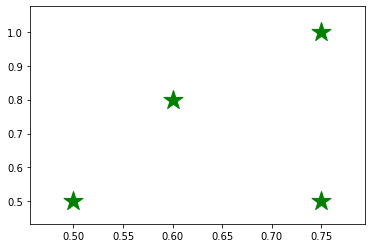

In [14]:
import matplotlib.pyplot as plt

x = [0.5, 0.75, 0.75, 0.6]
y = [0.5, 0.5, 1.0, 0.8]

plt.scatter(x, y, marker="*", s=400, c="green")

Text(0, 0.5, 'sepal width')

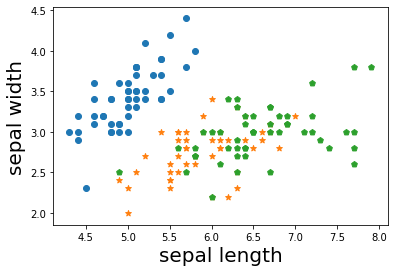

In [15]:
x_setosa = setosa_data["sepal.length"]
y_setosa = setosa_data["sepal.width"]

x_versicolor = versicolor_data["sepal.length"]
y_versicolor = versicolor_data["sepal.width"]

x_virginica = virginica_data["sepal.length"]
y_virginica = virginica_data["sepal.width"]

plt.scatter(x_setosa, y_setosa)
plt.scatter(x_versicolor, y_versicolor, marker="*")
plt.scatter(x_virginica, y_virginica, marker="p")

plt.xlabel("sepal length", fontsize=20)
plt.ylabel("sepal width", fontsize=20)

In [44]:
X_Setosa = setosa_data[["sepal.length", "sepal.width"]]
X_VersiColor = versicolor_data[["sepal.length", "sepal.width"]]

X_Setosa.loc[:, "label"] = X_Setosa.shape[0]*[1]
X_VersiColor.loc[:, "label"] = X_VersiColor.shape[0]*[0]

X = pd.concat([X_Setosa, X_VersiColor])

X.sample(frac = 1.0)

X_train = X[:80]
X_eval = X[80:]

y_train = X_train["label"]
X_train = X_train.drop("label", axis=1)

y_eval = X_eval["label"]
X_eval = X_eval.drop("label", axis=1)


In [45]:
import tensorflow as tf

feature_col_1 = tf.feature_column.numeric_column(key="sepal.length")
feature_col_2 = tf.feature_column.numeric_column(key="sepal.width")

linear_classifier = tf.estimator.LinearClassifier(feature_columns=[feature_col_1, feature_col_2])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/lc/__ck_ld57214s40pz1hxxlr00000gn/T/tmpm9lvp7ug', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
#ds = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))

def make_input_fn(data, labels, batch_size=40, num_epoch=5000):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
        ds = ds.batch(batch_size).repeat(num_epoch)
        return ds
    return input_fn

input_fn = make_input_fn(X_train, y_train)
linear_classifier.train(input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lc/__ck_ld57214s40pz1hxxlr00000gn/T/tmpm9lvp7ug/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20...
INFO:tensorflow:Saving checkpoints for 20 into /var/folders/lc/__ck_ld57214s40

INFO:tensorflow:global_step/sec: 767.926
INFO:tensorflow:loss = 0.11980331, step = 6720 (0.130 sec)
INFO:tensorflow:global_step/sec: 823.465
INFO:tensorflow:loss = 0.11892837, step = 6820 (0.121 sec)
INFO:tensorflow:global_step/sec: 1057.58
INFO:tensorflow:loss = 0.11807064, step = 6920 (0.095 sec)
INFO:tensorflow:global_step/sec: 1075.71
INFO:tensorflow:loss = 0.11722894, step = 7020 (0.093 sec)
INFO:tensorflow:global_step/sec: 986.688
INFO:tensorflow:loss = 0.11640356, step = 7120 (0.101 sec)
INFO:tensorflow:global_step/sec: 911.286
INFO:tensorflow:loss = 0.11559413, step = 7220 (0.110 sec)
INFO:tensorflow:global_step/sec: 1010.63
INFO:tensorflow:loss = 0.114799164, step = 7320 (0.099 sec)
INFO:tensorflow:global_step/sec: 1011.86
INFO:tensorflow:loss = 0.11401925, step = 7420 (0.099 sec)
INFO:tensorflow:global_step/sec: 913.843
INFO:tensorflow:loss = 0.11325312, step = 7520 (0.109 sec)
INFO:tensorflow:global_step/sec: 734.878
INFO:tensorflow:loss = 0.11250095, step = 7620 (0.136 sec)

In [49]:
eval_input_fn = make_input_fn(X_eval, y_eval, num_epoch=1)
linear_classifier.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-02T15:30:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lc/__ck_ld57214s40pz1hxxlr00000gn/T/tmpm9lvp7ug/model.ckpt-10020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.68714s
INFO:tensorflow:Finished evaluation at 2020-05-02-15:30:03
INFO:tensorflow:Saving dict for gl

{'accuracy': 0.9,
 'accuracy_baseline': 1.0,
 'auc': 0.0,
 'auc_precision_recall': 0.0,
 'average_loss': 0.26223016,
 'label/mean': 0.0,
 'loss': 0.26223016,
 'precision': 0.0,
 'prediction/mean': 0.21361616,
 'recall': 0.0,
 'global_step': 10020}

In [50]:
linear_classifier.get_variable_names()

['global_step',
 'linear/linear_model/bias_weights',
 'linear/linear_model/sepal.length/weights',
 'linear/linear_model/sepal.width/weights',
 'training/Ftrl/decay',
 'training/Ftrl/l1_regularization_strength',
 'training/Ftrl/l2_regularization_strength',
 'training/Ftrl/learning_rate',
 'training/Ftrl/learning_rate_power',
 'training/Ftrl/linear/linear_model/bias_weights/accumulator',
 'training/Ftrl/linear/linear_model/bias_weights/linear',
 'training/Ftrl/linear/linear_model/sepal.length/weights/accumulator',
 'training/Ftrl/linear/linear_model/sepal.length/weights/linear',
 'training/Ftrl/linear/linear_model/sepal.width/weights/accumulator',
 'training/Ftrl/linear/linear_model/sepal.width/weights/linear']

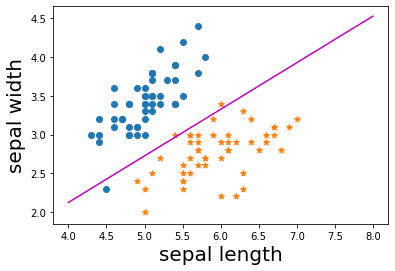

In [64]:
b = linear_classifier.get_variable_value("linear/linear_model/bias_weights")
w1 = linear_classifier.get_variable_value("linear/linear_model/sepal.length/weights")
w2 = linear_classifier.get_variable_value("linear/linear_model/sepal.width/weights")

x11 = 4.0
x12 = 8.0

x21 = (-w1*x11-b)/w2
x22 = (-w1*x12-b)/w2

# print(type(x21), " ", type(x22))
# print(x21, x22)

x21 = x21[0][0]
x22 = x22[0][0]

# print(type(x21), " ", type(x22))
# print(x21, x22)

plt.scatter(x_setosa, y_setosa)
plt.scatter(x_versicolor, y_versicolor, marker="*")

plt.xlabel("sepal length", fontsize=20)
plt.ylabel("sepal width", fontsize=20)

plt.plot([x11, x12], [x21, x22], "m-")


<IPython.core.display.Javascript object>


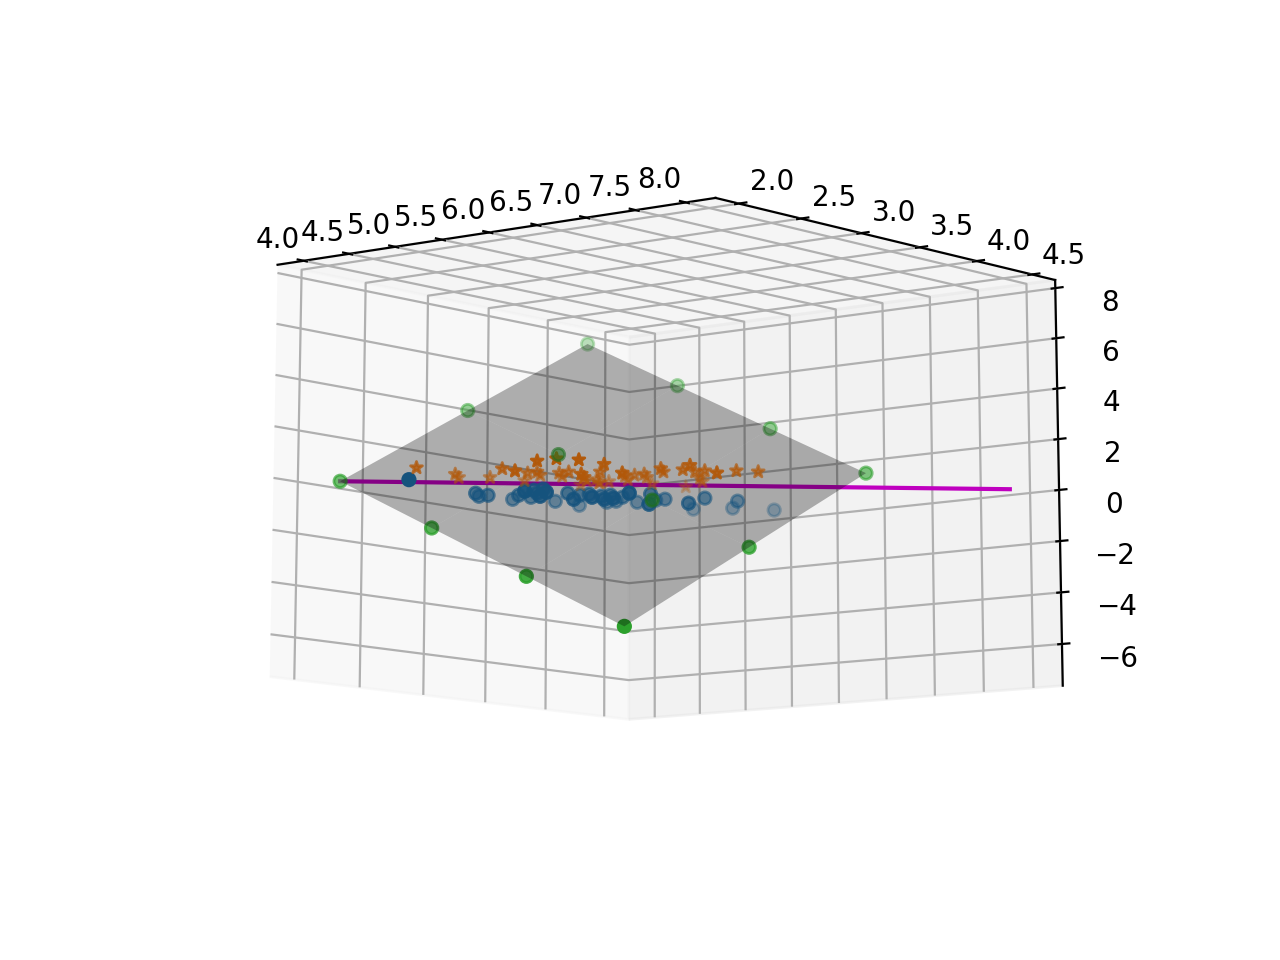

In [84]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import numpy as np

# print(nb.arange(0,1,0.1))

x_array = np.arange(x11, x12, 1)
y_array = np.arange(x21, x22, 1)

xx, yy = np.meshgrid(x_array, y_array)
# zz = np.zeros((xx.shape[0], xx.shape[1]))
zz = w1 * xx + w2 * yy + b

plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(x_setosa, y_setosa, len(y_setosa)*[0], marker="o")
plt3d.scatter(x_versicolor, y_versicolor, len(y_versicolor)*[0], marker="*")
plt3d.plot([x11, x12], [x21, x22], [0, 0], "m-")
plt3d.scatter(xx, yy, zz)
plt3d.plot_surface(xx, yy, zz, alpha=0.3, color="k")